### 作業目的: 熟練以Torchtext進行文本資料讀取

本次作業主要會使用[polarity](http://www.cs.cornell.edu/people/pabo/movie-review-data/)的電影評論來進行使用torchtext資料讀取，學員可以在附件的polarity.tsv看到所使用的資料。

Hint: 這次作業同學可以嘗試使用[torchtext.data.TabularDataset](https://torchtext.readthedocs.io/en/latest/data.html#tabulardataset)，可以更簡易讀取資料

### 載入套件

In [1]:
!pip install torchtext
!pip install spacy
!pip -m spacy download en


Usage:   
  pip3 <command> [options]

no such option: -m


In [2]:
import torch
import pandas as pd
import numpy as np
from torchtext import datasets
from torchtext.legacy import data

In [3]:
# 探索資料
# 可以發現資料為文本與類別，而類別即為正評與負評
input_data = pd.read_csv('./polarity.tsv', delimiter='\t', header=None, names=['text', 'label'])
input_data

,text,label
0,films adapted from comic books have had plenty...,1.0
1,every now and then a movie comes along from a ...,1.0
2,you've got mail works alot better than it dese...,1.0
3,jaws is a rare film that grabs your attentio...,1.0
4,moviemaking is a lot like being the general ma...,1.0
...,...,...
1620,"written by david j . schow and john shirley , ...",0.0
1621,"synopsis : sullen julie james , still haunted ...",0.0
1622,note : some may consider portions of the follo...,0.0
1623,what's to like about the world of extremely vi...,0.0


### 建立Pipeline生成資料

In [16]:
import re
def removeNoneEngChar(x):
  x = " ".join(x)
  x = re.sub("[^a-zA-Z]", " ", x)
  x = x.split()
  return x

In [17]:
# 建立Field與Dataset
### <your code> ###
text_field = data.Field(sequential = True, dtype = torch.float64, lower = True, tokenize = "spacy", preprocessing = removeNoneEngChar)
label_field = data.Field(sequential = False)

dataset_fields = [('text', text_field), ('label', label_field)]
dataset = data.TabularDataset(path = "polarity.tsv", fields = dataset_fields, format = "tsv")

In [18]:
# 取的examples並打亂順序
### <your code> ###
examples = dataset.examples

# 以8:2的比例切分examples
### <your code> ###
splitpoint = int(len(examples) * 0.8)

test_ex = examples[splitpoint:]
train_ex = examples[:splitpoint]

# 建立training與testing dataset
### <your code> ###
train_data = data.Dataset(examples=train_ex, fields={'text':text_field, 'label':label_field})
test_data = data.Dataset(examples=test_ex, fields={'text':text_field, 'label':label_field})

train_data[0].label, train_data[0].text

('1',
 ['films',
  'adapted',
  'from',
  'comic',
  'books',
  'have',
  'had',
  'plenty',
  'of',
  'success',
  'whether',
  'they',
  're',
  'about',
  'superheroes',
  'batman',
  'superman',
  'spawn',
  'or',
  'geared',
  'toward',
  'kids',
  'casper',
  'or',
  'the',
  'arthouse',
  'crowd',
  'ghost',
  'world',
  'but',
  'there',
  's',
  'never',
  'really',
  'been',
  'a',
  'comic',
  'book',
  'like',
  'from',
  'hell',
  'before',
  'for',
  'starters',
  'it',
  'was',
  'created',
  'by',
  'alan',
  'moore',
  'and',
  'eddie',
  'campbell',
  'who',
  'brought',
  'the',
  'medium',
  'to',
  'a',
  'whole',
  'new',
  'level',
  'in',
  'the',
  'mid',
  's',
  'with',
  'a',
  'part',
  'series',
  'called',
  'the',
  'watchmen',
  'to',
  'say',
  'moore',
  'and',
  'campbell',
  'thoroughly',
  'researched',
  'the',
  'subject',
  'of',
  'jack',
  'the',
  'ripper',
  'would',
  'be',
  'like',
  'saying',
  'michael',
  'jackson',
  'is',
  'starting

In [26]:
# 建立字典 build dictionary
### <your code> ###
text_field.build_vocab(train_data)
label_field.build_vocab(train_data)


print(f"Vocabularies of index 0-5: {text_field.vocab.itos[:10]} \n")

# print only the first 100 items in the dictionary
simplified_output = list(text_field.vocab.stoi.items())[:20]
print(f"words to index {simplified_output}")

Vocabularies of index 0-5: ['<unk>', '<pad>', 'the', 'a', 'and', 'of', 'to', 'is', 'in', 's'] 

words to index [('<unk>', 0), ('<pad>', 1), ('the', 2), ('a', 3), ('and', 4), ('of', 5), ('to', 6), ('is', 7), ('in', 8), ('s', 9), ('it', 10), ('that', 11), ('as', 12), ('with', 13), ('his', 14), ('for', 15), ('film', 16), ('he', 17), ('this', 18), ('but', 19)]


In [38]:
# create iterator for training and testing data
train_iter, test_iter = data.Iterator.splits(datasets = (train_data,test_data), 
                                             batch_size = (3,3), 
                                             repeat = False, 
                                             sort_key= lambda ex:len(ex.text))

TypeError: ignored

In [35]:
for train_batch in train_iter:
    print(train_batch.text, train_batch.text.shape)
    print(train_batch.label, train_batch.label.shape)
    break

TypeError: ignored

Notes: 
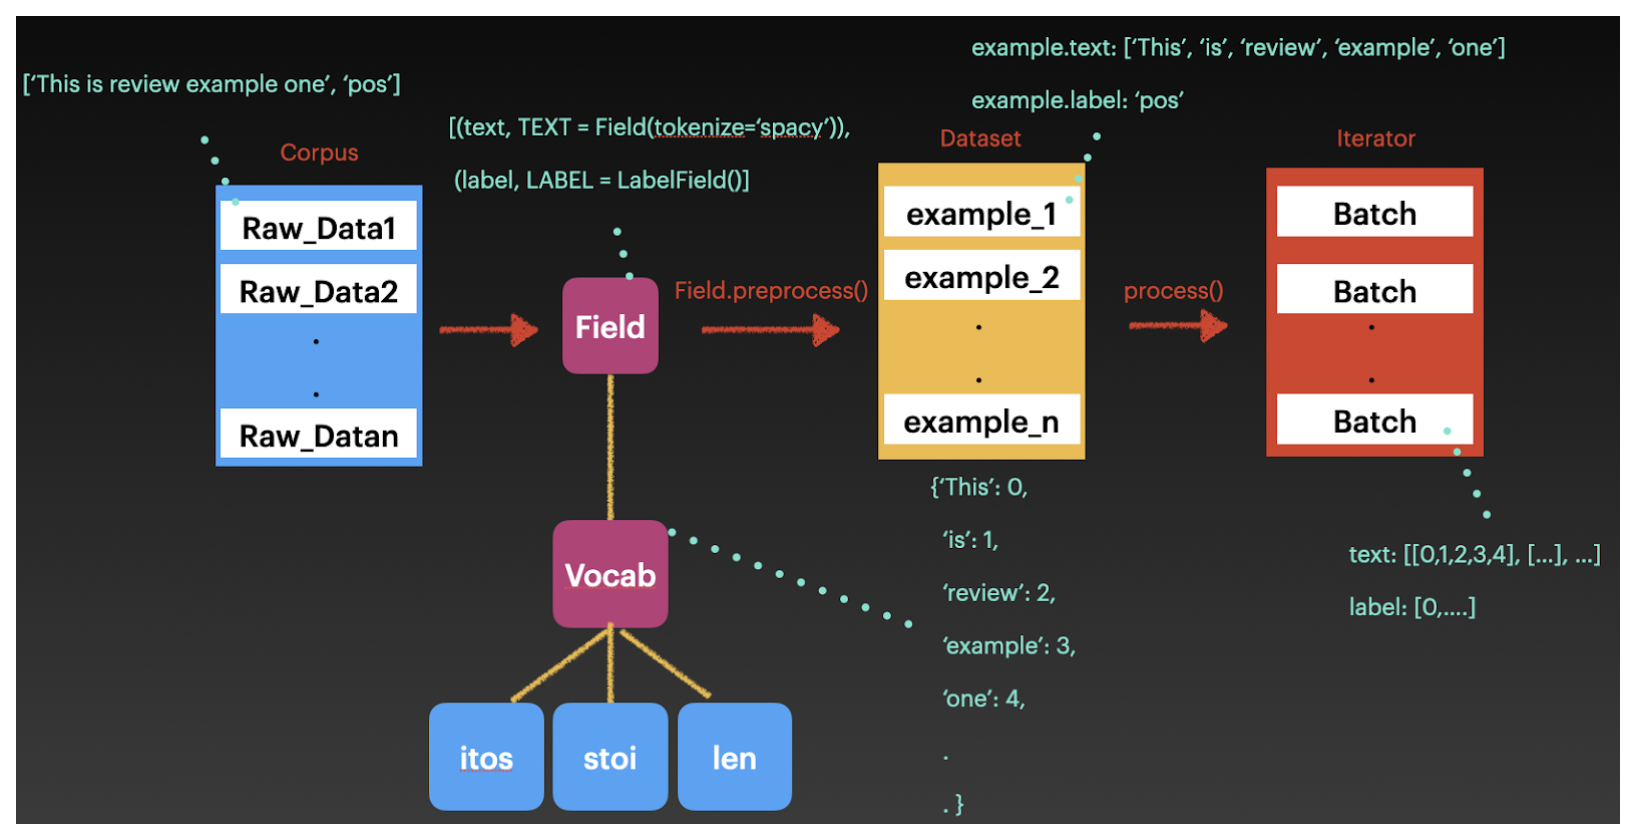